# 

In [452]:
import os 
import warnings 
warnings.simplefilter('ignore')


In [453]:
import numpy as np
import pandas as pd

In [454]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [455]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [456]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

#  b1 setting working directories

In [457]:
happy=os.listdir("C:/Users/aedpu/OneDrive/Documents/keeri3rd/emoji/happy")

In [458]:
sad=os.listdir("C:/Users/aedpu/OneDrive/Documents/keeri3rd/emoji/sad")

In [459]:
angry=os.listdir("C:/Users/aedpu/OneDrive/Documents/keeri3rd/emoji/angry")

# B2-reading image as a matrix of numbers 

In [460]:
limit=10
happy_img=[None]*limit
j=0
for i in happy:
    if(j<limit):
        happy_img[j]=imread("C:/Users/aedpu/OneDrive/Documents/keeri3rd/emoji/happy/"+i)
        j+=1
    else:
        break
        

In [461]:
limit=10
sad_img=[None]*limit
j=0
for i in sad:
    if(j<limit):
        sad_img[j]=imread("C:/Users/aedpu/OneDrive/Documents/keeri3rd/emoji/sad/"+i)
        j+=1
    else:
        break

In [462]:
limit=10
angry_img=[None]*limit
j=0
for i in angry:
    if(j<limit):
        angry_img[j]=imread("C:/Users/aedpu/OneDrive/Documents/keeri3rd/emoji/angry/"+i)
        j+=1
    else:
        break

# B2.1-View the images 

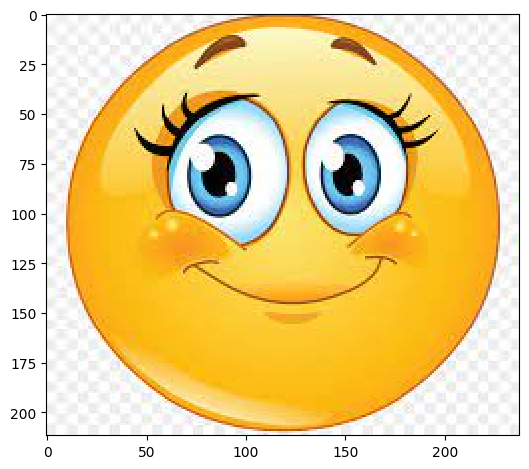

In [463]:
imshow(happy_img[8])

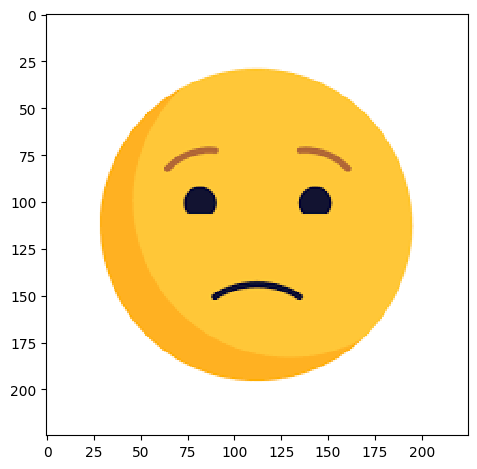

In [464]:
imshow(sad_img[9])

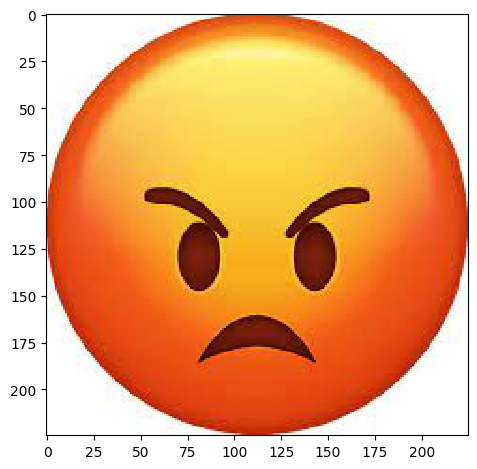

In [465]:
imshow(angry_img[5])

In [466]:
happy_gry=[None]*limit
j=0
for i in happy:
    if(j<limit):
        happy_gry[j]=rgb2gray(happy_img[j])
        j+=1
    else:
        break

In [467]:
sad_gry=[None]*limit
j=0
for i in sad:
    if(j<limit):
        sad_gry[j]=rgb2gray(sad_img[j])
        j+=1
    else:
        break

In [468]:
angry_gry=[None]*limit
j=0
for i in angry:
    if(j<limit):
        angry_gry[j]=rgb2gray(angry_img[j])
        j+=1
    else:
        break

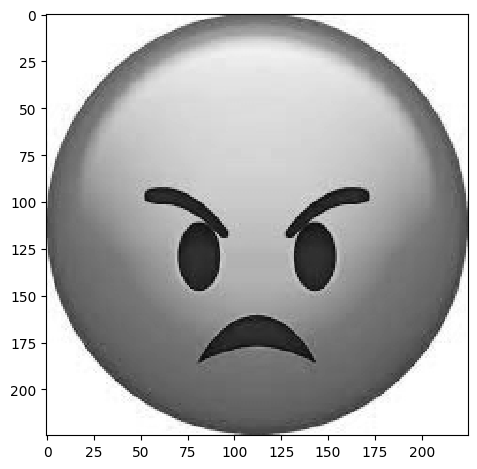

In [469]:
imshow(angry_gry[5])

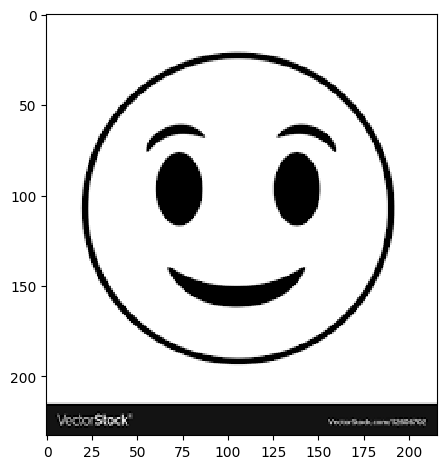

In [470]:
imshow(happy_gry[5])

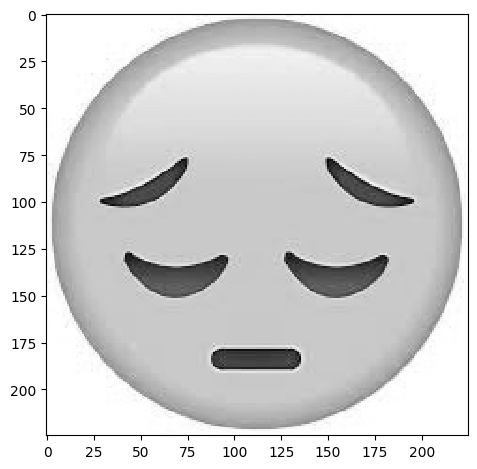

In [471]:
imshow(sad_gry[5])

#  size

In [472]:
sad_gry[2].shape

(225, 225)

In [473]:
sad_gry[3].shape

(225, 225)

In [474]:
sad_gry[6].shape

(225, 225)

In [475]:
sad_gry[2].shape

(225, 225)

In [476]:
happy_gry[8].shape

(212, 238)

In [477]:
for j in range(10):
    hp=happy_gry[j]
    happy_gry[j]=resize(hp,(512,512))

In [478]:
for j in range(10):
    sd=sad_gry[j]
    sad_gry[j]=resize(sd,(512,512))

In [479]:
for j in range(10):
    str =angry_gry[j]
    angry_gry[j]=resize(str,(512,512))

In [480]:
happy_gry[8].shape

(512, 512)

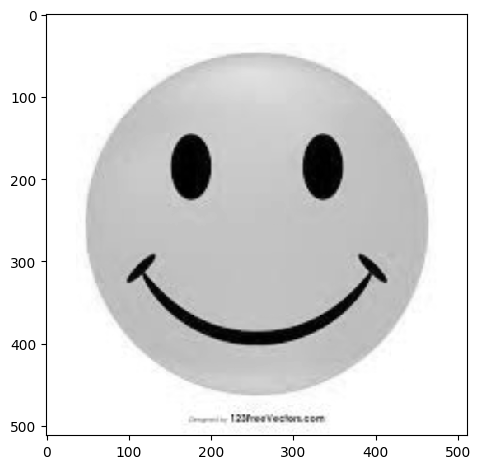

In [481]:
imshow(happy_gry[6])

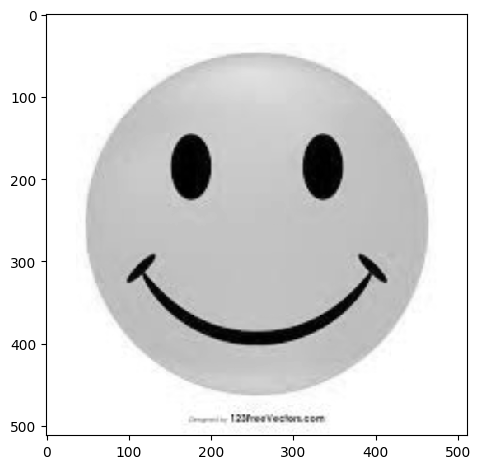

In [482]:
imshow(happy_gry[6])

# find out  the number of gray scale images


In [483]:
len_of_images_happy=len(happy_gry)

In [484]:
len_of_images_happy

10

#  create a variable image size

In [485]:
image_size_happy=happy_gry[1].shape

In [486]:
image_size_happy

(512, 512)

#  create a variable flatten size maddy

In [487]:
flatten_size_happy=image_size_happy[0]*image_size_happy[1]

In [488]:
flatten_size_happy

262144

#   now flatten the image from (512,512) mstrix into 262144,1 vector

In [489]:
for i in range(len_of_images_happy):
    happy_gry[i]=np.ndarray.flatten(happy_gry[i]).reshape(flatten_size_happy,1)

#  now satck the individual image arraye elements into one array

In [490]:
happy_gry=np.dstack(happy_gry)

In [491]:
happy_gry

array([[[1.        , 1.        , 1.        , ..., 0.92156863,
         0.99796923, 1.        ]],

       [[1.        , 1.        , 1.        , ..., 0.92156863,
         0.99777428, 1.        ]],

       [[1.        , 1.        , 1.        , ..., 0.92156863,
         0.99906314, 1.        ]],

       ...,

       [[1.        , 1.        , 1.        , ..., 0.92043579,
         0.92941176, 1.        ]],

       [[1.        , 1.        , 1.        , ..., 0.91919545,
         0.92941176, 1.        ]],

       [[1.        , 1.        , 1.        , ..., 0.91953723,
         0.92941176, 1.        ]]])

# now if we needed rollaxis

In [492]:
happy_gry=np.rollaxis(happy_gry,axis=2,start=0)

In [493]:
happy_gry.shape

(10, 262144, 1)

In [494]:
happy_gry=happy_gry.reshape(len_of_images_happy,flatten_size_happy)

In [495]:
happy_gry.shape

(10, 262144)

#  creating the dataframe of the image vectors

In [496]:
happy_data=pd.DataFrame(happy_gry)

In [497]:
happy_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.997178,0.997178,0.997178,0.997178,0.997178,0.997178,0.996171,0.994931,0.990922,0.984512,...,0.990898,0.996826,1.000000,1.000000,0.999818,0.998852,0.997885,0.998684,0.999650,0.999384
4,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,...,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.921569,0.921569,0.921569,0.921419,0.919696,0.917973,0.917647,0.917647,0.917388,0.916905,...,0.917647,0.917647,0.918447,0.920171,0.921569,0.921569,0.921569,0.920436,0.919195,0.919537
8,0.997969,0.997774,0.999063,1.000000,1.000000,1.000000,1.000000,1.000000,0.994174,0.988171,...,0.924831,0.921186,0.918022,0.930783,0.943543,0.938695,0.931403,0.929412,0.929412,0.929412
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#  type the image dataframe name to look into  the dataframe

In [498]:
happy_data["label"]="happy"

In [499]:
happy_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
3,0.997178,0.997178,0.997178,0.997178,0.997178,0.997178,0.996171,0.994931,0.990922,0.984512,...,0.996826,1.000000,1.000000,0.999818,0.998852,0.997885,0.998684,0.999650,0.999384,happy
4,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,...,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,happy
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,happy
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
7,0.921569,0.921569,0.921569,0.921419,0.919696,0.917973,0.917647,0.917647,0.917388,0.916905,...,0.917647,0.918447,0.920171,0.921569,0.921569,0.921569,0.920436,0.919195,0.919537,happy
8,0.997969,0.997774,0.999063,1.000000,1.000000,1.000000,1.000000,1.000000,0.994174,0.988171,...,0.921186,0.918022,0.930783,0.943543,0.938695,0.931403,0.929412,0.929412,0.929412,happy
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy


In [500]:
len_of_images_angry=len(angry_gry)

In [501]:
len_of_images_angry

10

In [502]:
image_size_angry=angry_gry[1].shape

In [503]:
image_size_angry

(512, 512)

In [504]:
flatten_size_angry=image_size_angry[0]*image_size_angry[1]

In [505]:
flatten_size_angry

262144

In [506]:
for i in range(len_of_images_angry):
    angry_gry[i]=np.ndarray.flatten(angry_gry[i]).reshape(flatten_size_angry,1)

In [507]:
angry_gry=np.dstack(angry_gry)

In [508]:
angry_gry

array([[[0.9782284 , 1.        , 0.92183766, ..., 1.        ,
         1.        , 0.98677292]],

       [[0.97789139, 1.        , 0.92154906, ..., 1.        ,
         1.        , 0.98715749]],

       [[0.9757621 , 1.        , 0.92008545, ..., 1.        ,
         1.        , 0.98994053]],

       ...,

       [[0.94799635, 1.        , 0.90128572, ..., 1.        ,
         1.        , 0.93347503]],

       [[0.97924741, 1.        , 0.94724839, ..., 1.        ,
         1.        , 0.93347503]],

       [[0.98419362, 1.        , 0.95631146, ..., 1.        ,
         1.        , 0.93347503]]])

In [509]:
angry_gry=np.rollaxis(angry_gry,axis=2,start=0)

In [510]:
angry_gry.shape

(10, 262144, 1)

In [511]:
angry_gry=angry_gry.reshape(len_of_images_angry,flatten_size_angry)

In [512]:
angry_gry.shape

(10, 262144)

In [513]:
angry_data=pd.DataFrame(angry_gry)

In [514]:
angry_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.978228,0.977891,0.975762,0.984116,0.996204,0.998698,0.999159,0.983565,0.963439,0.926489,...,0.900123,0.905070,0.903849,0.900967,0.898737,0.899208,0.922566,0.947996,0.979247,0.984194
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.921838,0.921549,0.920085,0.917457,0.914530,0.916629,0.919448,0.925182,0.932033,0.940653,...,0.906252,0.915746,0.915350,0.908704,0.907570,0.907669,0.898887,0.901286,0.947248,0.956311
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,0.986773,0.987157,0.989941,0.992245,0.994351,0.994677,0.994677,0.991199,0.986985,0.977883,...,0.945290,0.934758,0.938430,0.943887,0.938245,0.933475,0.933475,0.933475,0.933475,0.933475


In [515]:
angry_data["label"]="angry"

In [516]:
angry_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.978228,0.977891,0.975762,0.984116,0.996204,0.998698,0.999159,0.983565,0.963439,0.926489,...,0.905070,0.903849,0.900967,0.898737,0.899208,0.922566,0.947996,0.979247,0.984194,angry
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
2,0.921838,0.921549,0.920085,0.917457,0.914530,0.916629,0.919448,0.925182,0.932033,0.940653,...,0.915746,0.915350,0.908704,0.907570,0.907669,0.898887,0.901286,0.947248,0.956311,angry
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
9,0.986773,0.987157,0.989941,0.992245,0.994351,0.994677,0.994677,0.991199,0.986985,0.977883,...,0.934758,0.938430,0.943887,0.938245,0.933475,0.933475,0.933475,0.933475,0.933475,angry


In [517]:
len_of_images_sad=len(sad_gry)

In [518]:
len_of_images_sad

10

In [519]:
image_size_sad=sad_gry[1].shape

In [520]:
image_size_sad

(512, 512)

In [521]:
flatten_size_sad=image_size_sad[0]*image_size_sad[1]

In [522]:
flatten_size_sad

262144

In [523]:
for i in range(len_of_images_sad):
    sad_gry[i]=np.ndarray.flatten(sad_gry[i]).reshape(flatten_size_sad,1)

In [524]:
 sad_gry=np.dstack(sad_gry)

In [525]:
sad_gry

array([[[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.]]])

In [526]:
sad_gry=np.rollaxis(sad_gry,axis=2,start=0)

In [527]:
sad_gry.shape

(10, 262144, 1)

In [528]:
sad_gry=sad_gry.reshape(len_of_images_sad,flatten_size_sad)

In [529]:
sad_gry.shape

(10, 262144)

In [530]:
sad_data=pd.DataFrame(sad_gry)

In [531]:
sad_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.929412,0.929412,0.929412,0.929561,0.931284,0.933008,0.933333,0.933333,0.933592,0.934075,...,0.967085,0.967568,0.968852,0.971058,0.972939,0.973422,0.973905,0.971752,0.969349,0.970011
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [532]:
sad_data["label"]="sad"

In [533]:
sad_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
6,0.929412,0.929412,0.929412,0.929561,0.931284,0.933008,0.933333,0.933333,0.933592,0.934075,...,0.967568,0.968852,0.971058,0.972939,0.973422,0.973905,0.971752,0.969349,0.970011,sad
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad


# image matrix to convention

# combining three dataframe into one dataframe

In [534]:
emoji_1=pd.concat([happy_data,angry_data])

In [535]:
emoji=pd.concat([emoji_1,sad_data])

In [536]:
emoji

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
3,0.997178,0.997178,0.997178,0.997178,0.997178,0.997178,0.996171,0.994931,0.990922,0.984512,...,0.996826,1.000000,1.000000,0.999818,0.998852,0.997885,0.998684,0.999650,0.999384,happy
4,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,...,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,happy
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,0.074844,happy
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
7,0.921569,0.921569,0.921569,0.921419,0.919696,0.917973,0.917647,0.917647,0.917388,0.916905,...,0.917647,0.918447,0.920171,0.921569,0.921569,0.921569,0.920436,0.919195,0.919537,happy
8,0.997969,0.997774,0.999063,1.000000,1.000000,1.000000,1.000000,1.000000,0.994174,0.988171,...,0.921186,0.918022,0.930783,0.943543,0.938695,0.931403,0.929412,0.929412,0.929412,happy
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy


In [537]:
from sklearn.utils import shuffle


In [538]:
kolly_indexed=shuffle(emoji).reset_index()

In [539]:
kolly_indexed

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
1,2,0.921838,0.921549,0.920085,0.917457,0.914530,0.916629,0.919448,0.925182,0.932033,...,0.915746,0.915350,0.908704,0.907570,0.907669,0.898887,0.901286,0.947248,0.956311,angry
2,7,0.921569,0.921569,0.921569,0.921419,0.919696,0.917973,0.917647,0.917647,0.917388,...,0.917647,0.918447,0.920171,0.921569,0.921569,0.921569,0.920436,0.919195,0.919537,happy
3,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
4,4,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,...,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,happy
5,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
6,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
7,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
8,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
9,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry


In [540]:
kolly_emoji=kolly_indexed.drop(['index'],axis=1)

In [541]:
kolly_emoji

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
1,0.921838,0.921549,0.920085,0.917457,0.914530,0.916629,0.919448,0.925182,0.932033,0.940653,...,0.915746,0.915350,0.908704,0.907570,0.907669,0.898887,0.901286,0.947248,0.956311,angry
2,0.921569,0.921569,0.921569,0.921419,0.919696,0.917973,0.917647,0.917647,0.917388,0.916905,...,0.917647,0.918447,0.920171,0.921569,0.921569,0.921569,0.920436,0.919195,0.919537,happy
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
4,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,...,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,happy
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,happy
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sad
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,angry


In [542]:
kolly_emoji.to_csv("emoji.csv")

# assigning dependant and independant variables

In [543]:
x=kolly_emoji.values[:,:-1]

In [544]:
y=kolly_emoji.values[:,-1]

In [545]:
x

array([[1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [0.92183766331093, 0.921549062763289, 0.9200854457002527, ...,
        0.9012857199994255, 0.9472483940094594, 0.956311456490311],
       [0.9215686274509803, 0.9215686274509803, 0.9215686274509803, ...,
        0.920435785779766, 0.9191954481835458, 0.9195372300989487],
       ...,
       [0.9971775428921569, 0.9971775428921569, 0.9971775428921569, ...,
        0.998684071559532, 0.9996500875435623, 0.9993838964724073],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0]], dtype=object)

In [546]:
y

array(['sad', 'angry', 'happy', 'angry', 'happy', 'happy', 'angry', 'sad',
       'sad', 'angry', 'happy', 'angry', 'sad', 'sad', 'happy', 'happy',
       'happy', 'angry', 'angry', 'sad', 'happy', 'angry', 'sad', 'angry',
       'angry', 'sad', 'happy', 'happy', 'sad', 'sad'], dtype=object)

#  assigning training and testing dataset

In [547]:
from sklearn.model_selection import train_test_split

In [548]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [549]:
x_train.shape

(24, 262144)

In [550]:
x_test.shape

(6, 262144)

# principle compound analysis(pca)

In [551]:
from sklearn import decomposition

# compnent assignment for pca 

In [552]:
pca=decomposition.PCA(n_components=20,whiten=True,random_state=1)

# fitting th training set to generate principle components

In [553]:
pca.fit(x_train)

PCA(n_components=20, random_state=1, whiten=True)

#  transforming principle components

In [554]:
x_train_pca=pca.transform(x_train)

In [555]:
x_test_pca=pca.transform(x_test)

In [556]:
x_train_pca.shape

(24, 20)

In [557]:
x_test_pca.shape

(6, 20)

#  viewing the principle components or eigen

In [558]:
eigen=(np.reshape(x[10],(512,512)).astype(np.float64))

In [559]:
eigen

array([[0.99796923, 0.99777428, 0.99906314, ..., 1.        , 1.        ,
        1.        ],
       [0.99747557, 0.99723322, 0.9988354 , ..., 1.        , 1.        ,
        1.        ],
       [0.99866486, 0.99853668, 0.99938405, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.92681526, 0.92543658, 0.93455116, ..., 0.92941176, 0.92941176,
        0.92941176],
       [0.92681526, 0.92543658, 0.93455116, ..., 0.92941176, 0.92941176,
        0.92941176],
       [0.92681526, 0.92543658, 0.93455116, ..., 0.92941176, 0.92941176,
        0.92941176]])

# plotting images one by one as subplots

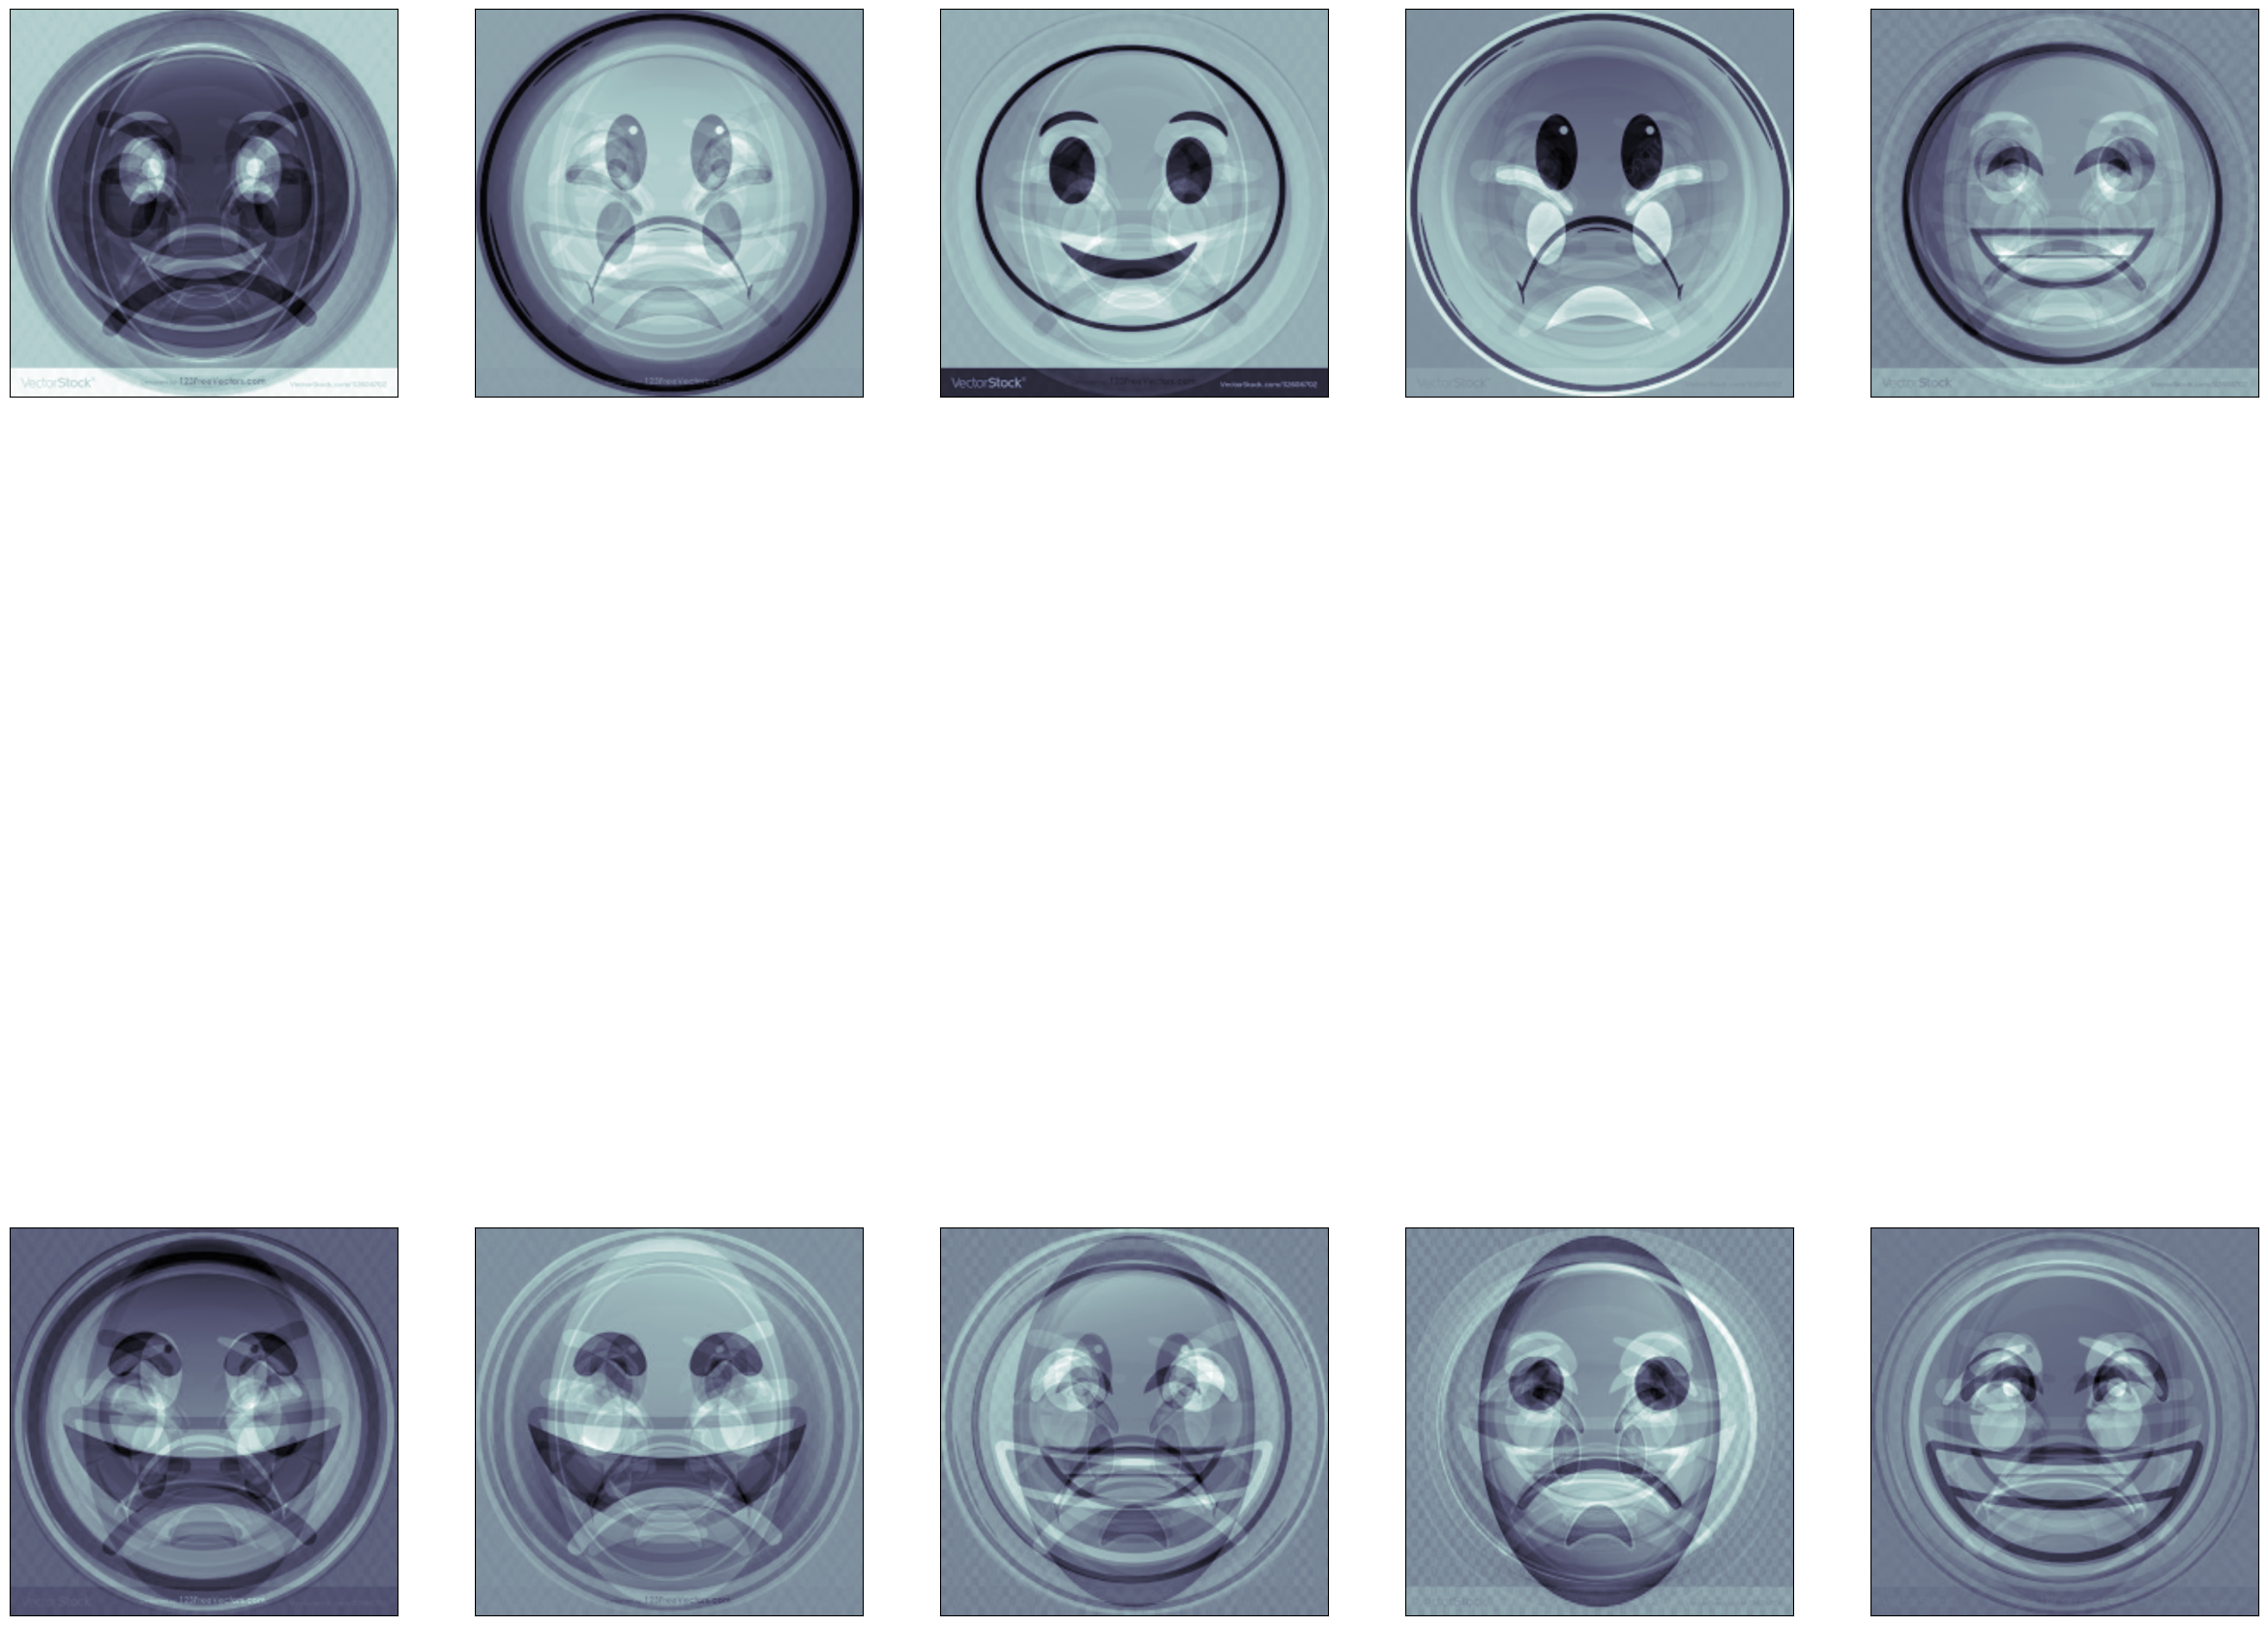

In [560]:
fig=plt.figure(figsize=(30,30))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape),cmap=plt.cm.bone)

In [561]:
from sklearn import svm

In [562]:
clf=svm.SVC(C=2,gamma=0.006,kernel='rbf')
clf.fit(x_train_pca,y_train)

SVC(C=2, gamma=0.006)

# image prediction 

In [563]:
y_pred=clf.predict(x_test_pca)

In [564]:
y_pred

array(['angry', 'angry', 'angry', 'angry', 'angry', 'angry'], dtype=object)

# prediction visualization

In [565]:
for i in range(np.random.randint(0,6,6)):
    predicted_image=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicted label: {0}'.format(y_pred[i]))
    plt.imshow(predicted_image,interpolation='nearest',cmap='gray')
    plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [566]:
from sklearn import metrics

In [567]:
accuracy=metrics.accuracy_score(y_test,y_pred)
accuracy

0.16666666666666666